In [1]:
import os
work_dir = '/home/martin/Projekte/OGC_Testbed-18/software/asos'
os.chdir(work_dir)

# Analyze Samples
## Imports

In [2]:
import random

from tlib import tlearn, tgeo, tutils
from projects.asos import config, utils

%load_ext autoreload
%autoreload 2

## Setup Files and Plotter

In [3]:
channel_indices = {'B2': 0, 'B3': 1, 'B4': 2, 'B5': 3, 'B6': 4, 'B7': 5, 'B8': 6, 'B8A': 7, 'B11': 8, 'B12': 9}

either files from dataset(s)...

In [4]:
# files from dataset
datasets = ['test']

# get files from given dataset
fi = utils.load_file_infos()
df = fi.df
df = df[df['datasplit'].isin(datasets)]
print(f'# files: {len(df)}')
files = df.index


if config.dataset == 'anthroprotect':
    
    nearby_files_possible = True  # only if df is available
    plot_predictions = True  # only if df is available
    batch_size = 64
    
    # setup s2 plotter
    s2_plotter = tgeo.s2.Plotter(
        folder_s2=config.data_folder_tiles,
        folder_scl=utils.get_corresponding_folder(config.data_folder_tiles, 's2_scl'),
        folder_lcs=utils.get_corresponding_folder(config.data_folder_tiles, 'lcs'),
        folder_masks=utils.get_corresponding_folder(config.data_folder_tiles, 'masks'),
        channel_indices=channel_indices,
    )

# setup asos plotter
asos_plotter = utils.Plotter(folder=config.data_folder_tiles)

# files: 2404


... or specific file(s):

In [5]:
# specific file

#folder = config.data_folder_tiles
folder = os.path.join(config.data_folder_investigative)

regex_filter = '.tif'  # e.g. '.tif', 'wdpa-Ia', ''wdpa-V_6926.tif'
smaller_than = 1000  # MB (up to 1000)


# get files from given folder and regex_filter
files = tutils.files.files_from_folder(folder, regex_filter=regex_filter, whole_path=True)
print(f'# files: {len(files)}')
# only files smaller than...
files = [file for file in files if os.path.getsize(file)/1000/1000 < smaller_than]
print(f'# files smaller than given size: {len(files)}')

nearby_files_possible = False  # only if df is available
plot_predictions = False  # only if df is available
batch_size = 1  # since sizes can be different

# setup plotter
s2_plotter = tgeo.s2.Plotter(folder_s2=folder, channel_indices=channel_indices)
asos_plotter = utils.Plotter(folder=folder)

# files: 64
# files smaller than given size: 64


## Plot Sample

file: /home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_windpark-markbygden-koler_2017-07-01-2017-08-30.tif
path:  /home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_windpark-markbygden-koler_2017-07-01-2017-08-30.tif


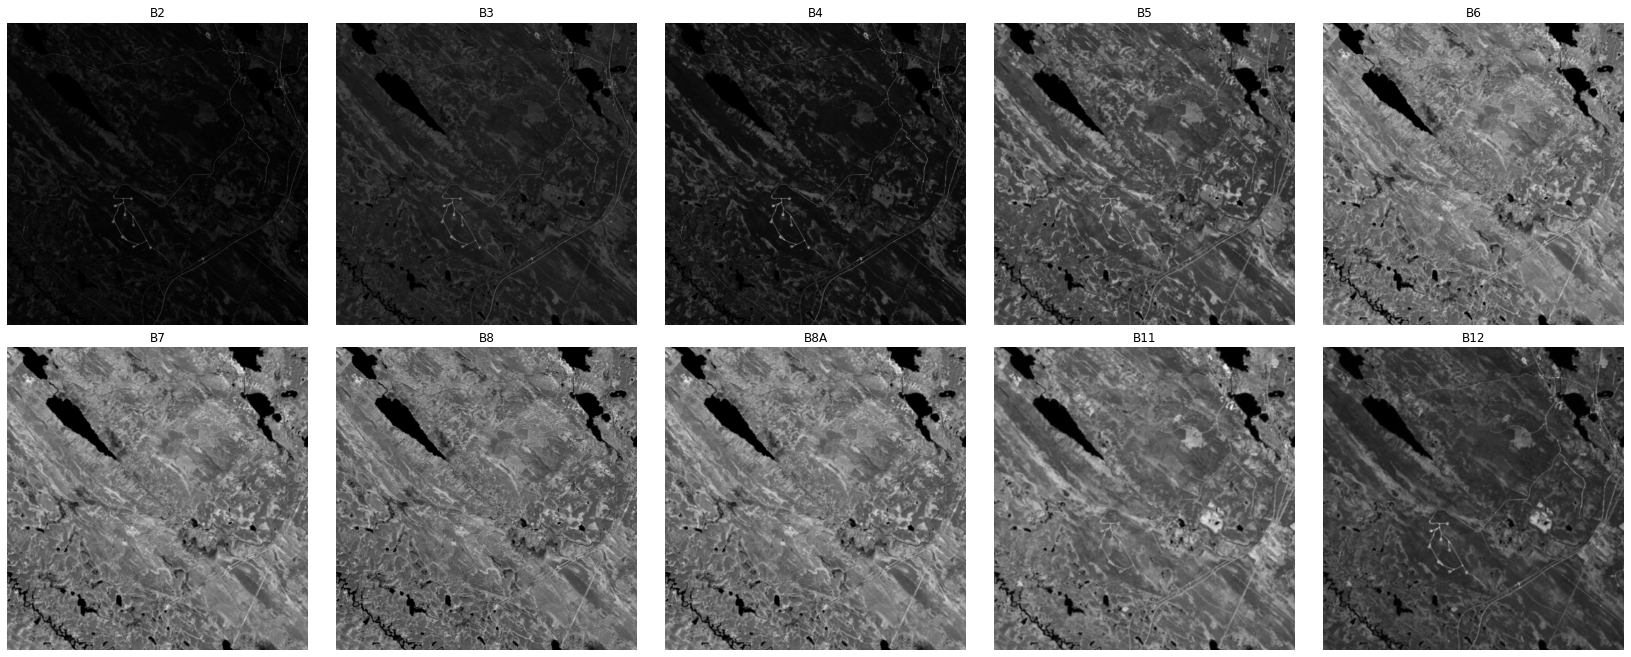

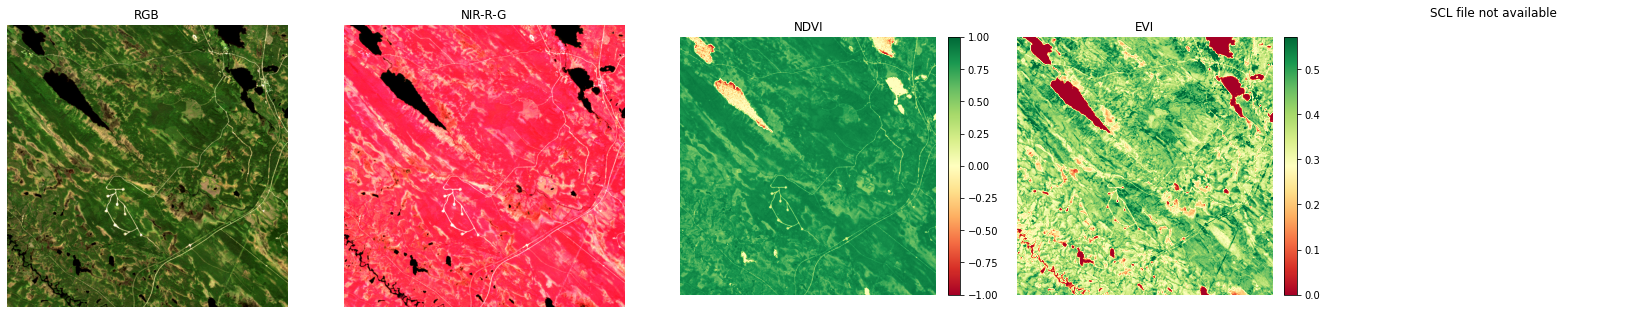

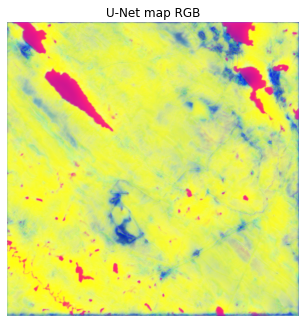

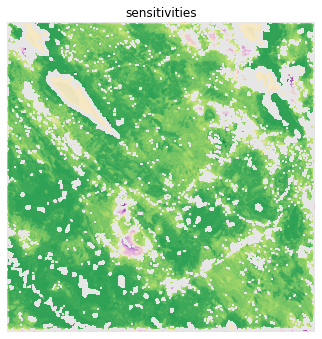

In [6]:
# get random sample from given dataset
index = random.sample(range(len(files)), 1)[0]
file = files[index]
#print(f'label: {int(df[df.index == file]["label"])}')
#print(f'pred:  {int(df[df.index == file]["pred"])}')

# plotter
s2_plotter.plot(
    file,

    plot_s2=True,
    plot_s2_channels=True,
    #plot_scl_without_artifacts=True,
    plot_lcs=True,
    #plot_legends=True,
    plot_masks=True,
)

asos_plotter.plot(
    file,
    
    plot_unet_maps=True,
    #plot_all_unet_maps=True,
    plot_sensitivities=True,
    #plot_osm=True,
    
    #fig_height=4.6,
)

## Plot Nearby Samples on Map

In [ ]:
square_size = 0.1

# get nearby samples
if nearby_files_possible:  # only if df is available  
    nearby_files = tgeo.utils.get_nearby_indices_from_df(
        df=df[df['datasplit'].isin(datasets)],
        index=file.split('/')[-1],
        square_size=square_size,
    )
    print(f'# nearby files: {len(nearby_files)}')
else:
    nearby_files = files

# plotter
m = s2_plotter.plot_on_map(
    *nearby_files,
    
    plot_rgb=True,
    #plot_false_colors=True,
    #plot_channels=['B6'],
    #plot_ndvi=True,
    #plot_evi=True,
    #plot_scl=True,
    #plot_lcs=['CORINE', 'MODIS_1', 'CGLS', 'GlobCover'],  # ['CORINE', 'MODIS_1', 'CGLS', 'GlobCover']
    #plot_legends=True,
    #plot_masks=['ROI', 'Valid_Area'],  # ['ROI', 'Valid_Area']
    #plot_locations=True,
    
    m=None,
    zoom=11,
)

asos_plotter.plot_on_map(
    *nearby_files,
    
    plot_preds=True,
    #plot_unet_maps=True,
    #plot_all_unet_maps=True,
    plot_sensitivities=True,
    #plot_osms=True,

    batch_size=batch_size,
    m=m,
    zoom=11,
)

['B4', 'B3', 'B2']:   0%|          | 0/64 [00:00<?, ?it/s]

batch:   0%|          | 0/64 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

sensitivity:   0%|          | 0/1 [00:00<?, ?it/s]

## All Files to RGB Tiff
Note: If you do not have a trained model, yet, you can ignore some of the plot_kwargs! To plot them, you need to predict the image.

In [ ]:
output_folder = os.path.join(config.working_dir, 'rgbs')  # os.path.join(utils.load_trainer().log_dir, 'rgbs')

In [ ]:
# plotter
s2_plotter.val_range_s2 = (0, 2**10.5)
s2_plotter.to_tif(
    *files,
    output_folder=output_folder,
    
    plot_rgb=True,
    #plot_false_colors=True,
    #plot_channels=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12'],
    #plot_ndvi=True,
    #plot_evi=True,
    #plot_scl=True,
    #plot_lcs=['CORINE', 'MODIS_1', 'CGLS', 'GlobCover'],  # ['CORINE', 'MODIS_1', 'CGLS', 'GlobCover']
    #plot_masks=['BB'],#['ROI', 'Valid_Area'],  # ['ROI', 'Valid_Area']
)

asos_plotter.to_tif(
    *files,
    output_folder=output_folder,
    
    plot_unet_maps=True,
    #plot_all_unet_maps=True,
    plot_sensitivities=True,
    #plot_osms=True,

    batch_size=batch_size,
)

## Create KML File

In [ ]:
if plot_predictions:
    kml = fi.preds_to_kml(files=fi.df.index)
else:
    kml = None

# add white background
#kml = tgeo.kml.background_to_kml(output_dir=output_folder, kml=kml)

kml = s2_plotter.tif_to_kml(main_folder=output_folder, kml=kml)

## Sample in Activation Space

In [7]:
asos = utils.load_asos()
#files = [file for file in files if file.split('/')[-1] == '351819.tif']
files

['/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_airport-lucas-U314_45664214.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_airport-lucas-U314_48824764.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_airport-lucas-U314_49505022.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_airport-lucas-U314_49884812.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_airport-lucas-U314_50964388.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_fjords-lofoten-valberg_2020-07-01-2020-08-30.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_fjords-lofoten-valberg_2021-07-01-2021-08-30.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_fjords-luster_2018-07-01-2018-08-30.tif',
 '/home/martin/Projekte/OGC_Testbed-18/data/anthroprotect/investigative/inv_fj

In [9]:
index = 0
unet_map = utils.predict_activation_maps(files[index])
vectors = tlearn.interpret.chspace.vectorize(array=unet_map, axis=1, random_frac=0.01)
asos.plot_chspace(vectors=vectors, colors='rgb', plotly=True)
print()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.45it/s]
